In [1]:
using Distributions
using Gadfly
using Interact

In [3]:
set_default_plot_size(25cm, 12cm)

Interact.Options{:SelectionSlider,Any}(29: "input-13" = 451 Any , "samples", 451, "451", 10, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"51"=>51,"101"=>101,"151"=>151,"201"=>201,"251"=>251,"301"=>301,"351"=>351,"401"=>401,"451"=>451…), Dict{Any,Any}(Pair{Any,Any}(101, "101"),Pair{Any,Any}(451, "451"),Pair{Any,Any}(351, "351"),Pair{Any,Any}(151, "151"),Pair{Any,Any}(701, "701"),Pair{Any,Any}(51, "51"),Pair{Any,Any}(801, "801"),Pair{Any,Any}(601, "601"),Pair{Any,Any}(251, "251"),Pair{Any,Any}(651, "651")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(31: "input-14" = 401 Any , "observations", 401, "401", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"101"=>101,"201"=>201,"301"=>301,"401"=>401,"501"=>501,"601"=>601,"701"=>701,"801"=>801,"901"=>901…), Dict{Any,Any}(Pair{Any,Any}(601, "601"),Pair{Any,Any}(901, "901"),Pair{Any,Any}(101, "101"),Pair{Any,Any}(201, "201"),Pair{Any,Any}(501, "501"),Pair{Any,Any}(701, "701"),Pair{Any,Any}(301, "301"),Pair{Any,Any}(401, "401"),Pair{Any,Any}(801, "801"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(33: "input-15" = 5 Any , "β0", 5, "5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(35: "input-16" = 0.5 Any , "β1", 0.5, "0.5", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…), Dict{Any,Any}(Pair{Any,Any}(0.6, "0.6"),Pair{Any,Any}(0.3, "0.3"),Pair{Any,Any}(0.7, "0.7"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(0.9, "0.9"),Pair{Any,Any}(0.8, "0.8"),Pair{Any,Any}(0.5, "0.5"),Pair{Any,Any}(0.1, "0.1"),Pair{Any,Any}(0.4, "0.4")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(37: "input-17" = 0 Any , "u_μ", 0, "0", 6, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-5"=>-5,"-4"=>-4,"-3"=>-3,"-2"=>-2,"-1"=>-1,"0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(-1, "-1"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(-4, "-4"),Pair{Any,Any}(-3, "-3"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(-2, "-2"),Pair{Any,Any}(-5, "-5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(39: "input-18" = 3 Any , "u_σ", 3, "3", 3, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5), Dict{Any,Any}(Pair{Any,Any}(4, "4"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(1, "1"))), Any[], Any[], true, "horizontal")

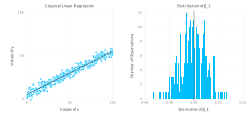

In [5]:
@manipulate for samples in 1:50:1000, observations in 1:100:1000, β0 in 0:10, β1 in 0:0.1:1, u_μ in -5:5, u_σ in 1:5
    
    # Create lists for values of β_0 and β_1
    β0_hat = []
    β1_hat = []
    
    # Collect values of β among different samples
    for sample in 1:1:samples 
    
        ## Initial
        x_values = rand(Uniform(0,100),observations)
        u = rand(Normal(u_μ, u_σ),observations)
        y_values = β0 + β1 * x_values + u
        
        ## Classical Linear Regression
        X = [ones(x_values) x_values]
        β = inv(X'*X)*X'*y_values
        
        ## Save values
        push!(β0_hat, β[1])
        push!(β1_hat, β[2])
    
    end    
    
    # Plot
    
    ## Example values
    x_values = rand(Uniform(0,100),observations)
    u = rand(Normal(u_μ, u_σ),observations)
    y_values = β0 + β1 * x_values + u
    X = [ones(x_values) x_values]
    β = inv(X'*X)*X'*y_values
    
    # CLR graph
    graph_CLR = plot(
        layer(x=x_values, y=y_values, Geom.point, order=1),
        layer(x=x_values, y=X*β, Geom.line, order=2, Theme(default_color=colorant"black", line_width=1pt)),
        Guide.XLabel("Values of x"),
        Guide.YLabel("Values of y"),
        Guide.Title("Classical Linear Regression"),
        Coord.Cartesian(xmin=0,xmax=100,ymin=0,ymax=100, fixed=true)
    )
    
    # Distribtuion of β_1
    graph_β = plot(
        layer(x=β1_hat, Geom.histogram, order=1),
        layer(xintercept=[β1], Geom.vline(color=["black"], style=[[1mm]], size=[.5mm]), order=3),
        Guide.XLabel("Estimates of β_1"),
        Guide.YLabel("Number of Observations"),
        Guide.Title("Distribution of β_1")

    )
    
    hstack(graph_CLR, graph_β)
    
end

<br>